Nama : Muhammad Rayyan Aqiilah Manna

NIM : 1103210210

Tugas : Tugas Week 7 XGBoost on melb_data dataset

Dataset : Heart Failure Clinical Records Dataset

Dokumentasi ChatGPT : https://chat.openai.com/c/d3fc1655-ec4d-4a10-a67b-82a559e157c5

#Mount Drive to Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

#Load Dataset

In [3]:
data_path = "/content/drive/MyDrive/Dataset/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(data_path)

#Analisis Dataaset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Mengecek dataset apakah memiliki nilai kosong atau tidak

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Menampilkan fitur statistik dari dataset

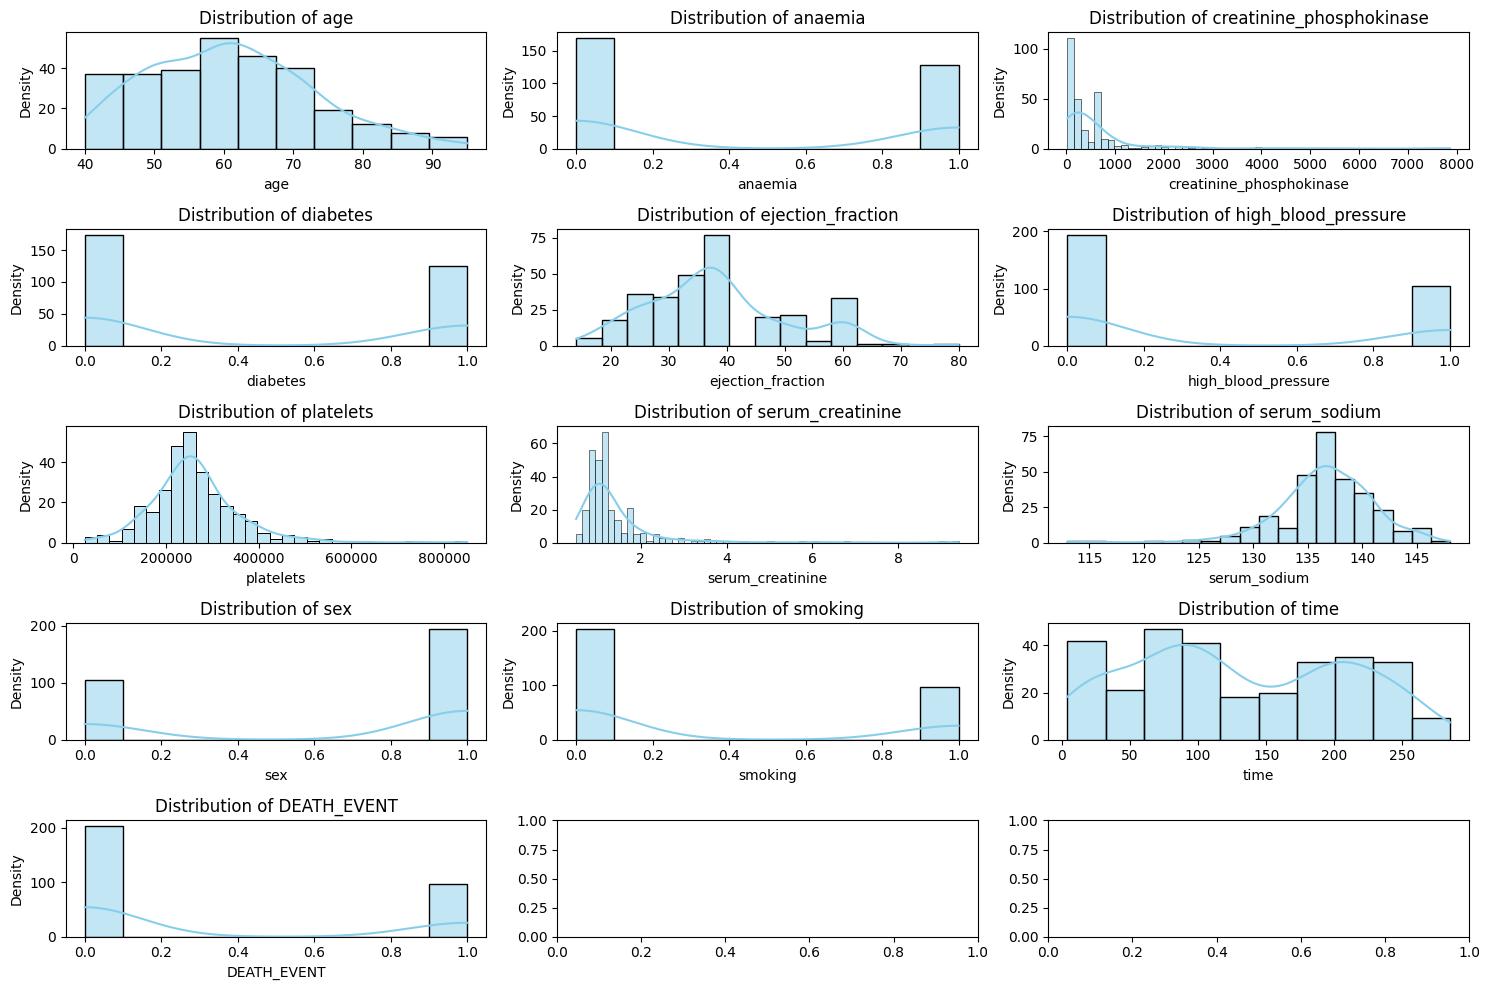

In [6]:
# Mendapatkan list nama fitur (kolom) dalam dataset
features = df.columns

# Mendefinisikan jumlah subplot sesuai dengan jumlah fitur
num_plots = len(features)

# Menentukan jumlah baris dan kolom subplot
num_rows = num_plots // 3 + (num_plots % 3 > 0)
num_cols = 3

# Membuat subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Mengatur indeks plot awal
plot_index = 0

# Loop untuk membuat plot histogram untuk setiap fitur
for i in range(num_rows):
    for j in range(num_cols):
        if plot_index < num_plots:
            # Plot histogram untuk fitur saat ini
            sns.histplot(df[features[plot_index]], kde=True, ax=axs[i, j], color='skyblue', edgecolor='black')
            axs[i, j].set_xlabel(features[plot_index])
            axs[i, j].set_ylabel('Density')
            axs[i, j].set_title('Distribution of ' + features[plot_index])

            plot_index += 1

# Menyesuaikan layout subplot
plt.tight_layout()
plt.show()


Memvisualisasikan data setiap fitur dalam dataset dan menampilkan garis trennya

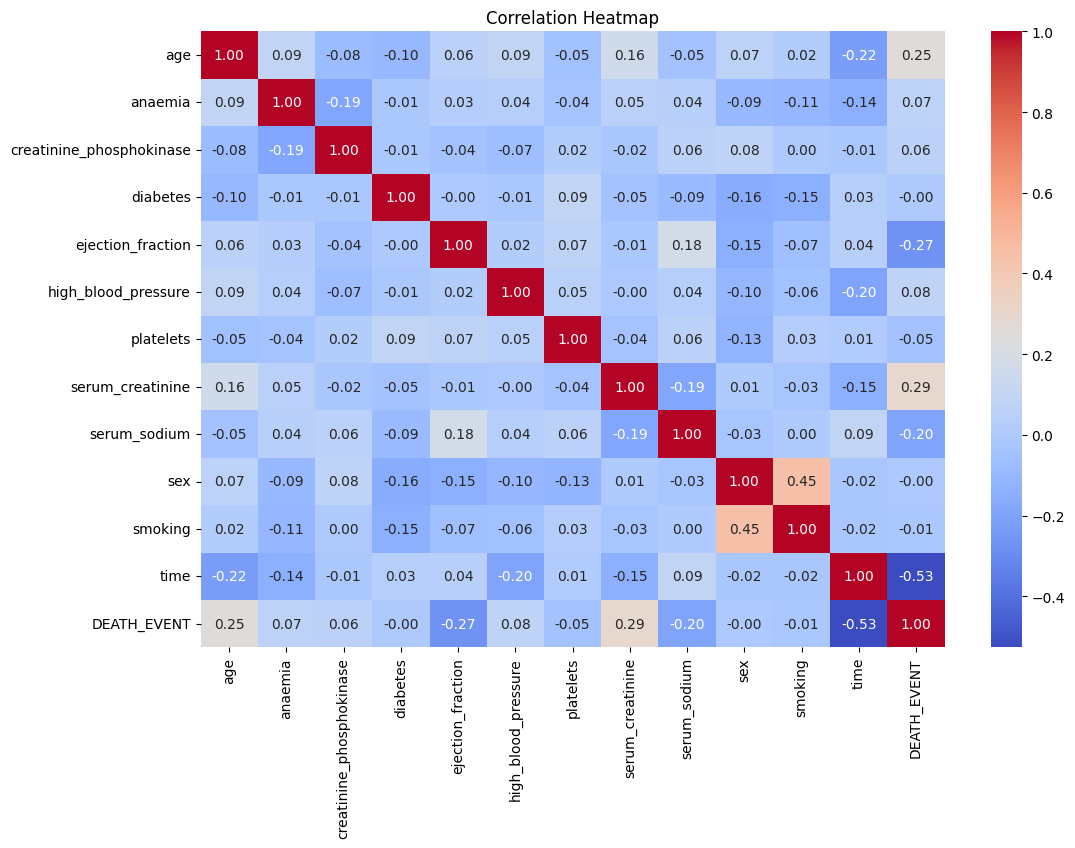

In [7]:
# Menghitung matriks korelasi antar fitur
correlation_matrix = df.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Menampilkan heatmap dataset untuk menganalisis korelasi antar fitur

In [8]:
# Memisahkan fitur dan label
X = df.drop('DEATH_EVENT', axis=1)  # fitur
y = df['DEATH_EVENT']  # label

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model SVM
model = SVC(kernel='linear', random_state=42)  # Anda dapat mengubah jenis kernel sesuai kebutuhan
model.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model.predict(X_test)

# Mengevaluasi keakurasian hasil prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60



Akurasi yang dihasilkan oleh model SVM adalah 75%. Jika ingin meningkatkan tingkat keakuratannya, maka dapat membuat beberapa model SVM lagi dan berikan hyperparameters.

